# Prepare data set

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Directories
train_dir = '/Users/ankit/code/innovations_docs/auto_approve/lux_dataset/updated_dataset/ds_10072024/classifier/train'

In [5]:
image_size = (224, 224)
image_size

(224, 224)

In [28]:
# ImageDataGenerator for data augmentation and rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20% of the data for validation
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

image_size

# Training data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,  # Resizing images to 224x224
    batch_size=32,
    class_mode='binary',
    subset='training'
)

# Validation data generator
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 767 images belonging to 2 classes.


Found 191 images belonging to 2 classes.


In [29]:
# Load MobileNetV2 pre-trained on ImageNet, excluding the top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Binary classification

# Create the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10  # Adjust epochs as necessary
)




Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 23s 746ms/step - accuracy: 0.7002 - loss: 0.5437 - val_accuracy: 0.9187 - val_loss: 0.2005
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8750 - loss: 0.3063 - val_accuracy: 0.9355 - val_loss: 0.1701
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 19s 664ms/step - accuracy: 0.9183 - loss: 0.2157 - val_accuracy: 0.9563 - val_loss: 0.1359
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 1.0000 - loss: 0.0607 - val_accuracy: 0.9355 - val_loss: 0.1842
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 19s 646ms/step - accuracy: 0.9703 - loss: 0.1139 - val_accuracy: 0.9438 - val_loss: 0.1361
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 1.0000 - loss: 0.0635 - val_accuracy: 0.9355 - val_loss: 0.0802
Epoch 7/10


2024-08-28 18:56:12.148574: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


23/23 ━━━━━━━━━━━━━━━━━━━━ 20s 660ms/step - accuracy: 0.9722 - loss: 0.0908 - val_accuracy: 0.9563 - val_loss: 0.1144
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 1.0000 - loss: 0.0463 - val_accuracy: 0.9355 - val_loss: 0.1758
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 20s 684ms/step - accuracy: 0.9825 - loss: 0.0666 - val_accuracy: 0.9438 - val_loss: 0.1361
Epoch 10/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9688 - loss: 0.0783 - val_accuracy: 0.9032 - val_loss: 0.2213


In [30]:
# Unfreeze some layers of the base model for fine-tuning
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Re-compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Fine-tune the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10  # Adjust epochs as necessary
)



Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 24s 785ms/step - accuracy: 0.8714 - loss: 0.3370 - val_accuracy: 0.9187 - val_loss: 0.2754
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8750 - loss: 0.4005 - val_accuracy: 0.9677 - val_loss: 0.1596
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 20s 706ms/step - accuracy: 0.9780 - loss: 0.0654 - val_accuracy: 0.9125 - val_loss: 0.3319
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 1.0000 - loss: 0.0601 - val_accuracy: 0.9677 - val_loss: 0.2250
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 20s 673ms/step - accuracy: 0.9807 - loss: 0.0542 - val_accuracy: 0.8813 - val_loss: 0.2441
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9688 - loss: 0.1190 - val_accuracy: 0.9355 - val_loss: 0.0961
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 20s 682ms/step - accuracy: 0.9870 - loss: 0.0390 - val_accuracy: 0.9187 - val_loss: 0.2169
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 0.

# Train Model

In [31]:
model.save('receipt_classifier_312.h5')

# prediction

In [6]:
from tensorflow.keras.preprocessing import image
import numpy as np

import numpy as np
from tensorflow.keras.preprocessing import image

# Function to preprocess the image
def preprocess_image(img_path, target_size=image_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale the image to [0, 1]
    return img_array

# Function to make a prediction
def predict_receipt_type(img_path):
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)
    class_index = int(prediction[0] > 0.5)  # Assuming binary classification with threshold 0.5
    class_labels = ['Handwritten', 'Printed']
    return class_labels[class_index], prediction[0]



# Load and preprocess a new image
img_path = '/Users/ankit/code/innovations_docs/auto_approve/lux_dataset/updated_dataset/ds_10072024/classifier/test/hand/0ahdpgjuib.jpg'
receipt_type, confidence = predict_receipt_type(img_path)
print(f'Receipt Type: {receipt_type}, Confidence: {confidence}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
Receipt Type: Handwritten, Confidence: [0.00208672]


/var/folders/2d/pvchbzgd1s7c2jy60p9lpbn00000gn/T/ipykernel_5477/1028631426.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  class_index = int(prediction[0] > 0.5)  # Assuming binary classification with threshold 0.5


In [7]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('receipt_classifier_312.h5')

# Define the path to the test dataset
test_dir = '/Users/ankit/code/innovations_docs/auto_approve/lux_dataset/updated_dataset/ds_10072024/classifier/test'

# Valid image extensions
valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif')

# Prepare a list to hold the results
results = []

# Iterate through the test directory
for subdir, _, files in os.walk(test_dir):
    label = os.path.basename(subdir)  # Extract the label from the folder name
    for file in files:
        if file.endswith(valid_extensions) and file != '.DS_Store':
            file_path = os.path.join(subdir, file)
            receipt_type, confidence = predict_receipt_type(file_path)
            results.append([file, label, receipt_type, confidence])

# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=['Filename', 'Original Label', 'Prediction', 'Confidence'])

# Save the DataFrame to a CSV file
results_df.to_csv('predictions.csv', index=False)

print("Predictions saved to predictions.csv")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/var/folders/2d/pvchbzgd1s7c2jy60p9lpbn00000gn/T/ipykernel_5477/1028631426.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  class_index = int(prediction[0] > 0.5)  # Assuming binary classification with threshold 0.5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predictions saved to predictions.csv


# CAM

/var/folders/2d/pvchbzgd1s7c2jy60p9lpbn00000gn/T/ipykernel_5477/2313598412.py:33: RuntimeWarning: invalid value encountered in divide
  heatmap /= np.max(heatmap)
/var/folders/2d/pvchbzgd1s7c2jy60p9lpbn00000gn/T/ipykernel_5477/2313598412.py:41: RuntimeWarning: invalid value encountered in cast
  heatmap = np.uint8(255 * heatmap)


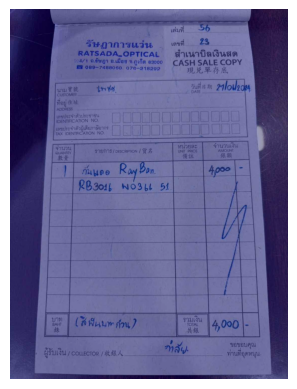

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras import backend as K
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import tensorflow as tf

# Load the trained model
model = load_model('receipt_classifier_312.h5')

# Function to generate Grad-CAM heatmap
def generate_grad_cam(model, img_array, last_conv_layer_name):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        class_channel = preds[:, 0]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    heatmap = last_conv_layer_output[0].numpy()

    for i in range(pooled_grads.shape[0]):
        heatmap[:, :, i] *= pooled_grads[i].numpy()

    heatmap = np.mean(heatmap, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    return heatmap

# Function to overlay heatmap on image
def overlay_heatmap(img_path, heatmap, alpha=0.4, colormap=cv2.COLORMAP_JET):
    img = cv2.imread(img_path)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, colormap)
    superimposed_img = cv2.addWeighted(img, 1-alpha, heatmap, alpha, 0)
    return superimposed_img

# Load and preprocess the image
img_path = '/Users/ankit/code/innovations_docs/auto_approve/lux_dataset/updated_dataset/ds_10072024/classifier/test/hand/0ahdpgjuib.jpg'
img = image.load_img(img_path, target_size=image_size)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Generate Grad-CAM heatmap
heatmap = generate_grad_cam(model, img_array, last_conv_layer_name='Conv_1')

# Overlay heatmap on original image
superimposed_img = overlay_heatmap(img_path, heatmap)

# Display the image
plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [19]:
# Load the model
model = load_model('receipt_classifier_312.h5')

# Test with an example image
img_path = '/Users/ankit/code/innovations_docs/auto_approve/lux_dataset/updated_dataset/ds_10072024/classifier/test/hand/1yqtk0z8uy.jpg'
img = image.load_img(img_path, target_size=(256, 256))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Generate the heatmap
heatmap = get_gradcam_heatmap(model, img_array)

# Display the Grad-CAM
display_gradcam(img_path, heatmap)

NameError: name 'get_gradcam_heatmap' is not defined